### Importing libraries

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

### Creating Dataset

In [2]:
N = 100
X = np.random.random(N) * 6 - 3
y = 0.5 * X - 1 + np.random.randn(N) * 0.5

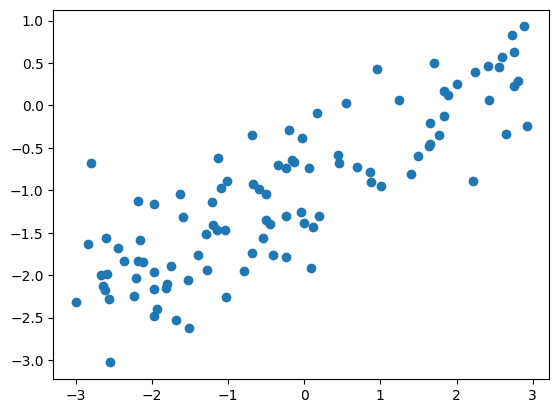

In [3]:
plt.scatter(X, y);

In [4]:
X.shape

(100,)

### Building Model

In [5]:
i = Input(shape=(1,))
x = Dense(1)(i)

model = Model(i, x)

In [6]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
model.compile(
        loss = 'mse',
        optimizer = Adam(learning_rate=0.01),
        metrics = ['mae']
    )

In [8]:
r = model.fit(
    X.reshape(-1,1), y,
    epochs=200,
    batch_size = 32
)

Epoch 1/200


4/4 [==============================] - 0s 3ms/step - loss: 1.1506 - mae: 0.9541
Epoch 2/200
4/4 [==============================] - 0s 2ms/step - loss: 1.0443 - mae: 0.9069
Epoch 3/200
4/4 [==============================] - 0s 2ms/step - loss: 0.9576 - mae: 0.8634
Epoch 4/200
4/4 [==============================] - 0s 3ms/step - loss: 0.8789 - mae: 0.8197
Epoch 5/200
4/4 [==============================] - 0s 5ms/step - loss: 0.8194 - mae: 0.7844
Epoch 6/200
4/4 [==============================] - 0s 4ms/step - loss: 0.7614 - mae: 0.7509
Epoch 7/200
4/4 [==============================] - 0s 4ms/step - loss: 0.7092 - mae: 0.7192
Epoch 8/200
4/4 [==============================] - 0s 3ms/step - loss: 0.6621 - mae: 0.6912
Epoch 9/200
4/4 [==============================] - 0s 2ms/step - loss: 0.6177 - mae: 0.6635
Epoch 10/200
4/4 [==============================] - 0s 2ms/step - loss: 0.5799 - mae: 0.6398
Epoch 11/200
4/4 [==============================] - 0s 2ms/step - loss: 0.545

### Visualizing the loss and mae

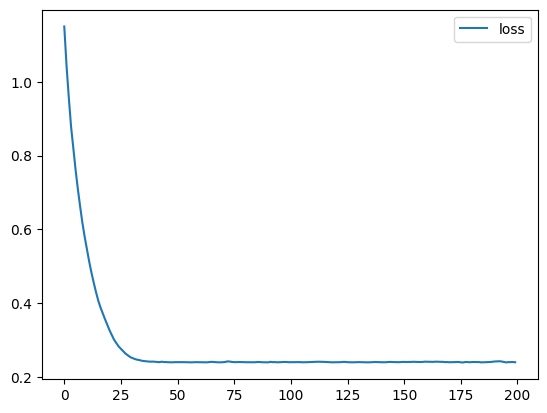

In [9]:
plt.plot(r.history['loss'], label='loss')
plt.legend();

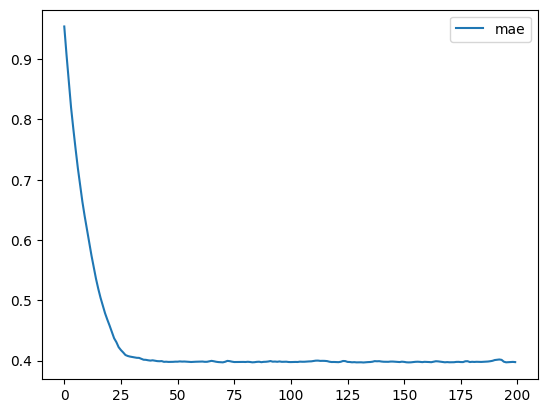

In [10]:
plt.plot(r.history['mae'], label='mae')
plt.legend();

### Making predictions

In [11]:
X_test = np.linspace(-3, 3, 20).reshape(-1,1)
y_pred = model.predict(X_test)

1/1 [==============================] - 0s 92ms/step


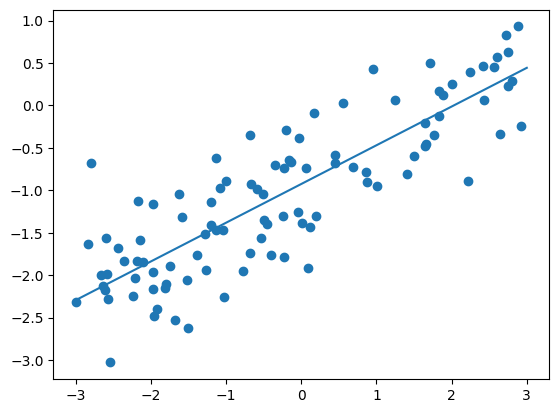

In [12]:
plt.scatter(X, y)
plt.plot(X_test, y_pred);

### Checked the learned parameters

In [13]:
model.layers

In [14]:
model.layers[1].get_weights()

[array([[0.45633194]], dtype=float32), array([-0.92530274], dtype=float32)]